DAVIN EDBERT SANTOSO HALIM // 2602067086

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

In [2]:
df =  pd.read_csv("data_1C.csv")

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


# DATA EXPLORATION

In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(8237, 17)

DataFrame berisi data dalam bentuk tabel dengan 8237 baris dan 17 kolom

In [6]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8237.000000,8237.000000,8222.000000,8237.000000,8237.000000,8237.000000
mean,4118.000000,40.000486,260.189370,2.555299,962.352434,0.172393
std,2377.961417,10.331078,254.942835,2.663180,187.221927,0.481973
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000
25%,2059.000000,32.000000,103.000000,1.000000,999.000000,0.000000
50%,4118.000000,38.000000,183.000000,2.000000,999.000000,0.000000
75%,6177.000000,47.000000,324.000000,3.000000,999.000000,0.000000
max,8236.000000,98.000000,3284.000000,43.000000,999.000000,6.000000


memberikan ringkasan statistik untuk kolom-kolom numerik dalam DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8227 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8222 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


Untuk melihat persebaran dari setiap variable

In [8]:
for c in df.columns:
    print(df[c].value_counts())
    print('_'*50)
    print()

Unnamed: 0
0       1
5534    1
5500    1
5499    1
5498    1
       ..
2741    1
2740    1
2739    1
2738    1
8236    1
Name: count, Length: 8237, dtype: int64
__________________________________________________

age
31    377
32    376
36    367
34    364
35    362
     ... 
17      2
83      2
98      1
84      1
87      1
Name: count, Length: 73, dtype: int64
__________________________________________________

job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64
__________________________________________________

marital
married     4943
single      2345
divorced     936
unknown       13
Name: count, dtype: int64
__________________________________________________

education
university.degree      2456
high.school            1902
basic.9y         

In [9]:
df.nunique()

Unnamed: 0     8237
age              73
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1022
campaign         31
pdays            21
previous          7
poutcome          3
y                 2
dtype: int64

# DATA PREPROCESSING

In [10]:
drop_col = ['Unnamed: 0']
df = df.drop(drop_col, axis=1)

Alasan di-drop:

Bisa dilihat bahwa hasil df.nunique() untuk kolom 'Unnamed: 0' adalah 8237, yang berarti setiap nilai dalam kolom tersebut adalah unik sehingga tidak dibutuhkan dan tidak memberikan pola untuk model.

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


Mengecek apakah kolom 'Unnamed: 0' sudah terhapus

In [12]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int', 'float']).columns

Membuat variable untuk kolom categorical dan numerical

In [13]:
print("Numerical Columns:", num_col)
print("-"*100)
print("Categorical Columns:", cat_col)

Numerical Columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
----------------------------------------------------------------------------------------------------
Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# EDA

Untuk Kolom Categorical, saya menggunakan BarChart dan PieChart untuk visualisasi

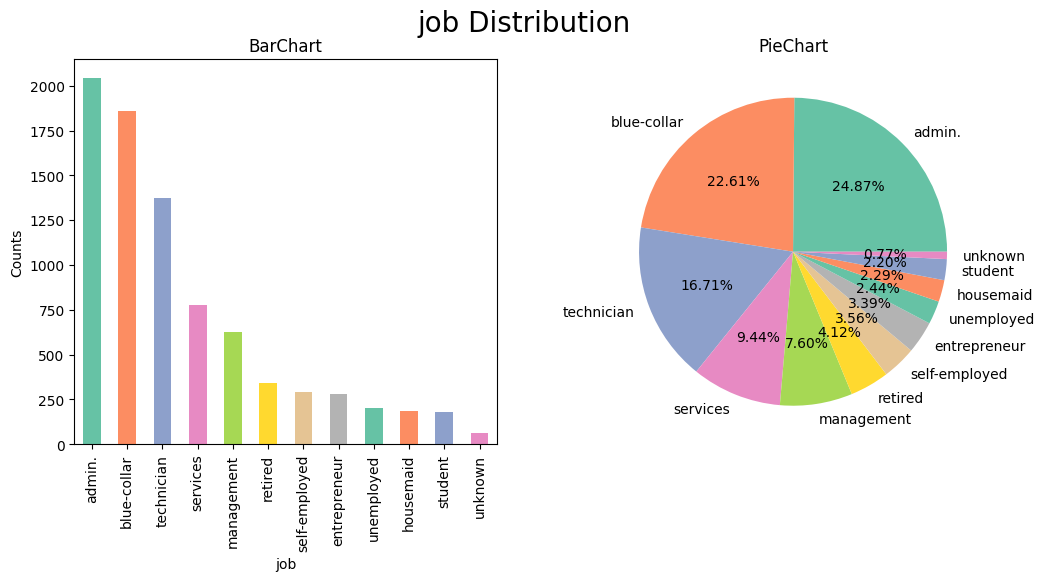

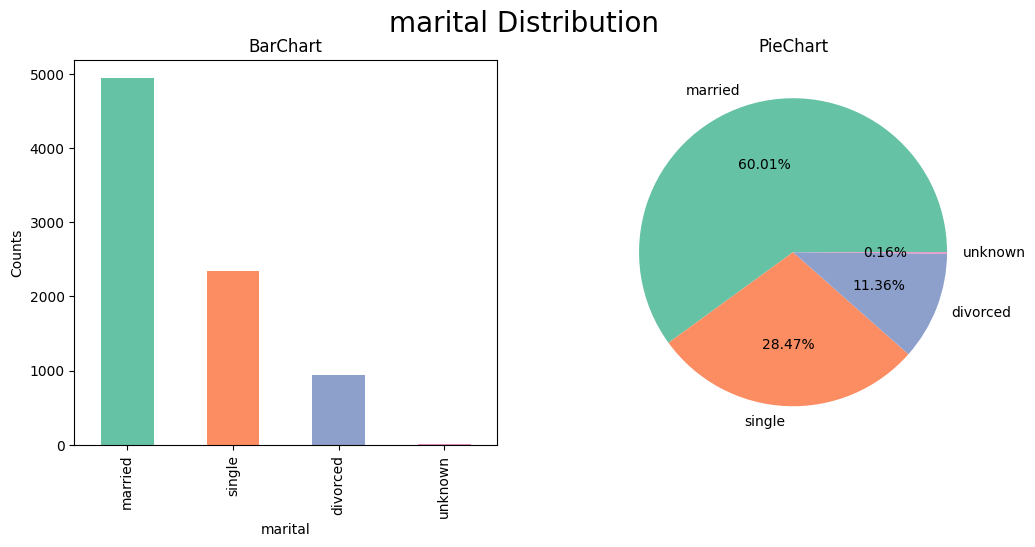

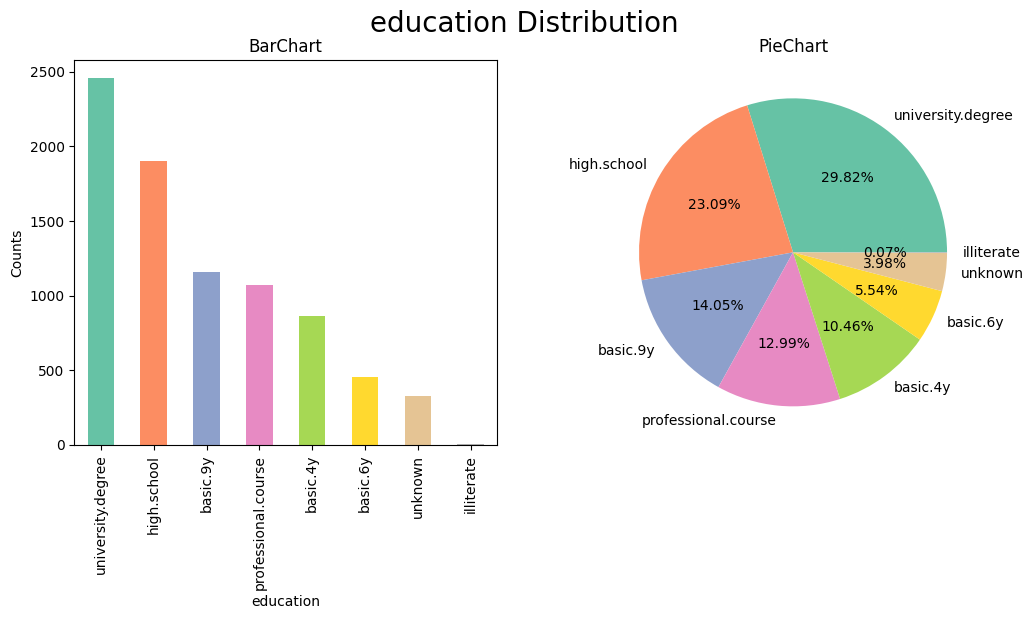

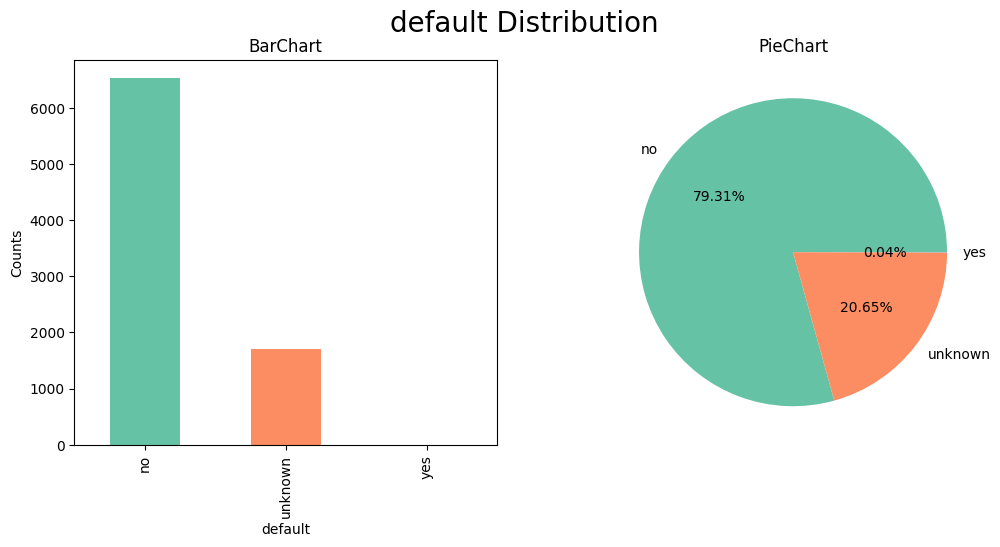

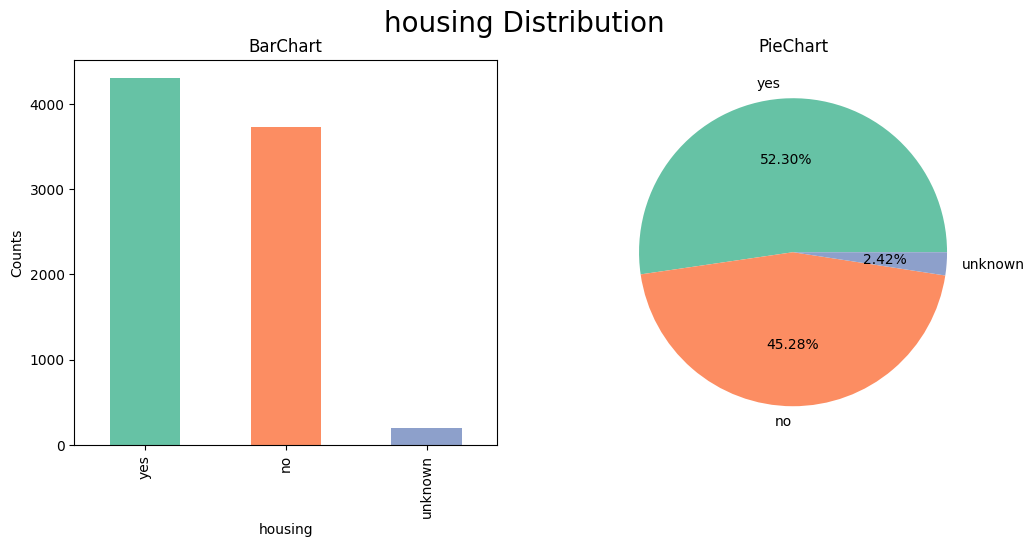

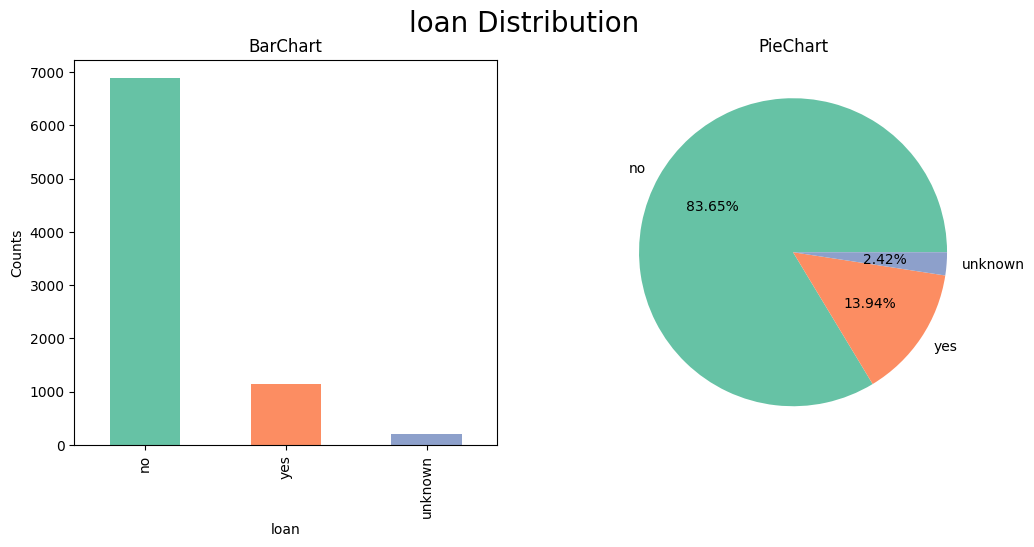

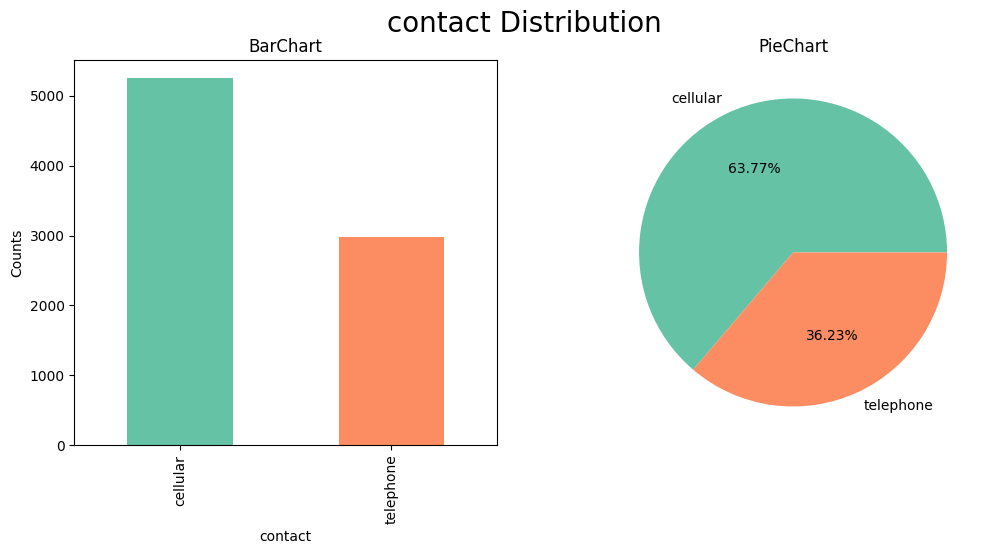

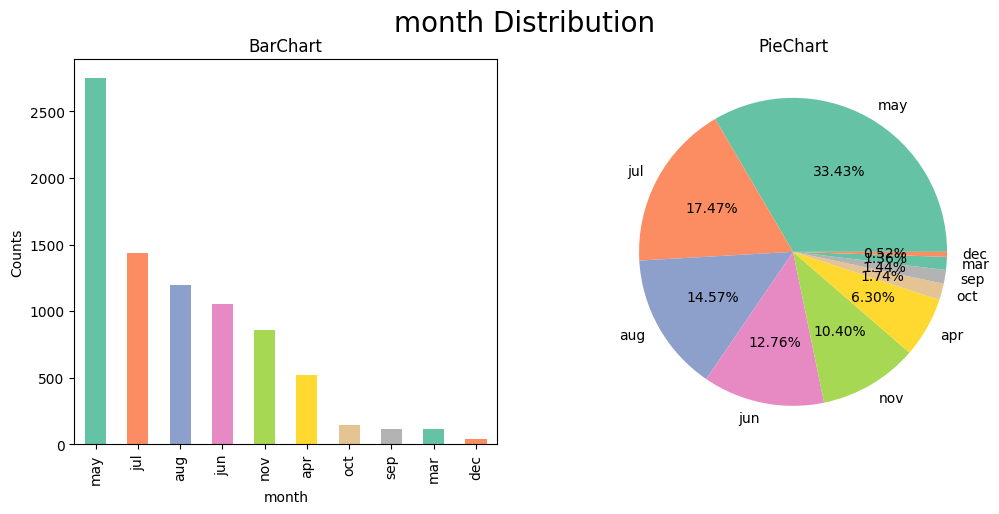

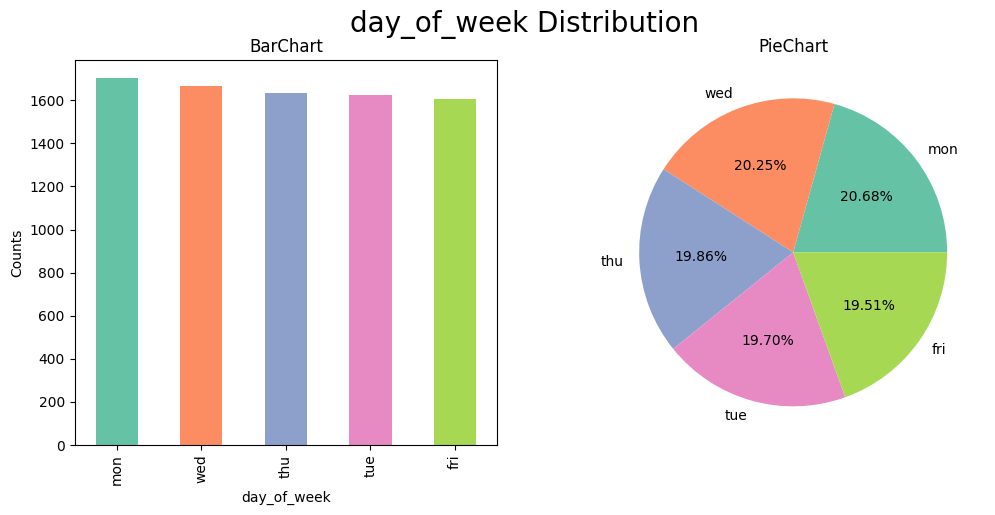

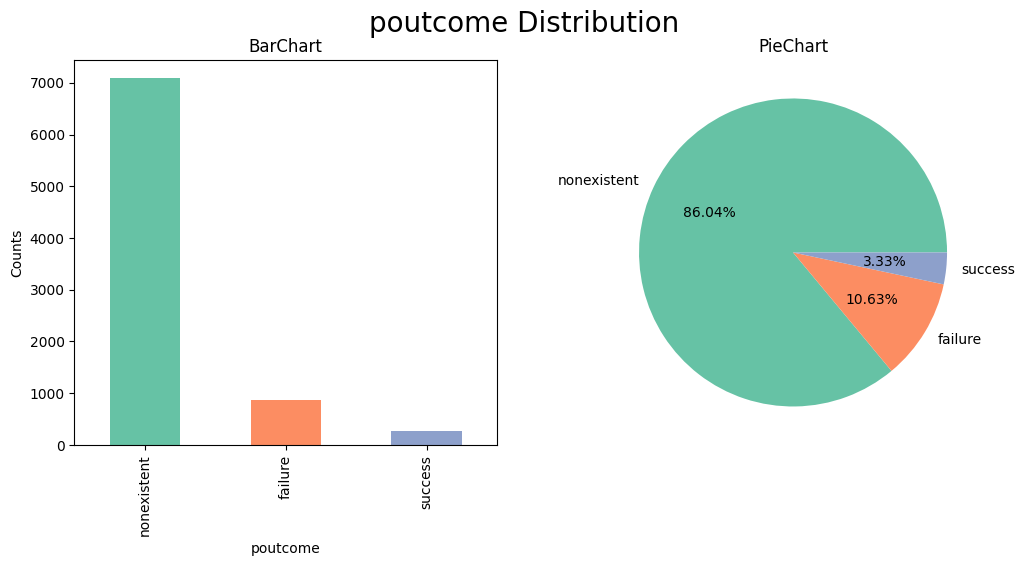

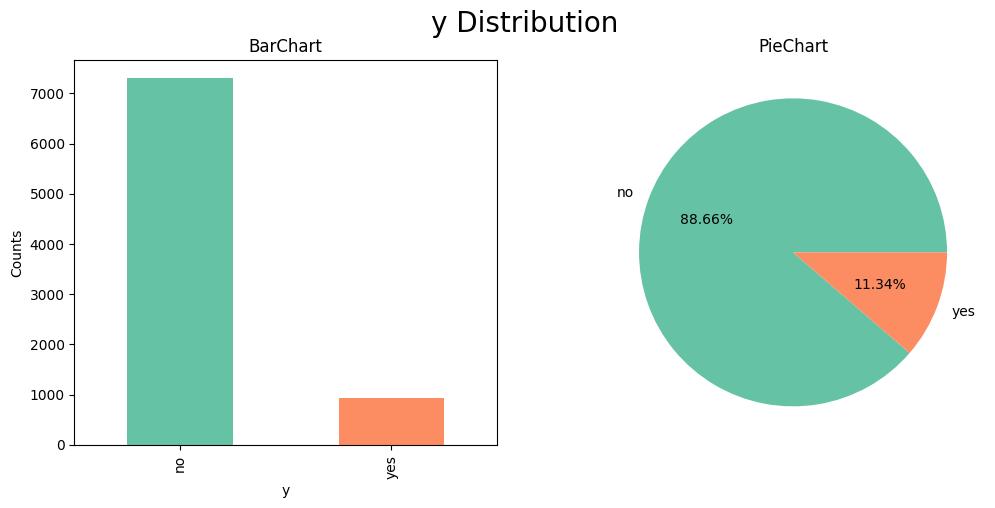

In [14]:
palette = sns.color_palette("Set2")

for column in cat_col:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle(f"{column} Distribution", fontsize=20)

    plt.subplot(1,2,1)
    df[column].value_counts().plot(kind='bar', color=palette)
    plt.title("BarChart")
    plt.ylabel("Counts")
    plt.xlabel(column)

    plt.subplot(1,2,2)
    df[column].value_counts().plot(kind='pie', colors=palette, autopct="%.2f%%")
    plt.title("PieChart")
    plt.ylabel("")

    plt.show()

Untuk Kolom Numerical, saya menggunakan Histogram dan Boxplot untuk visualisasi

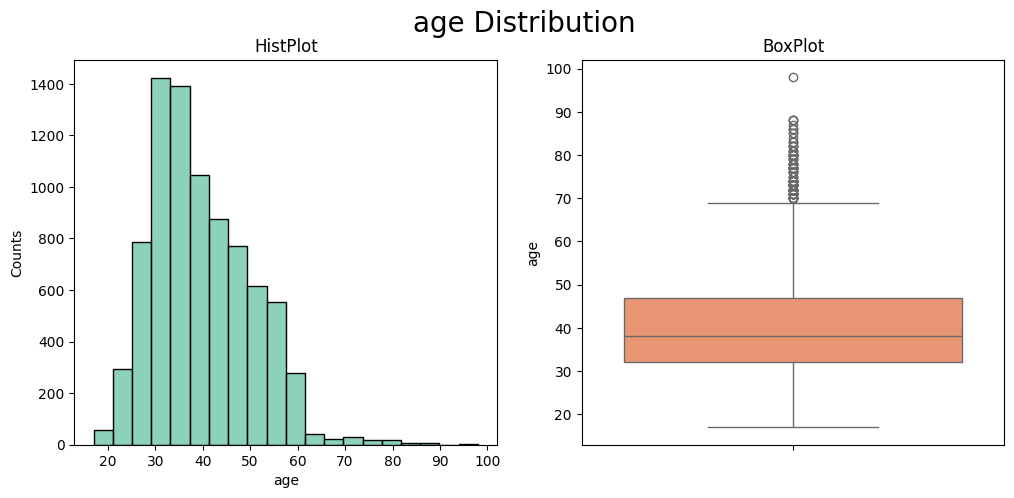

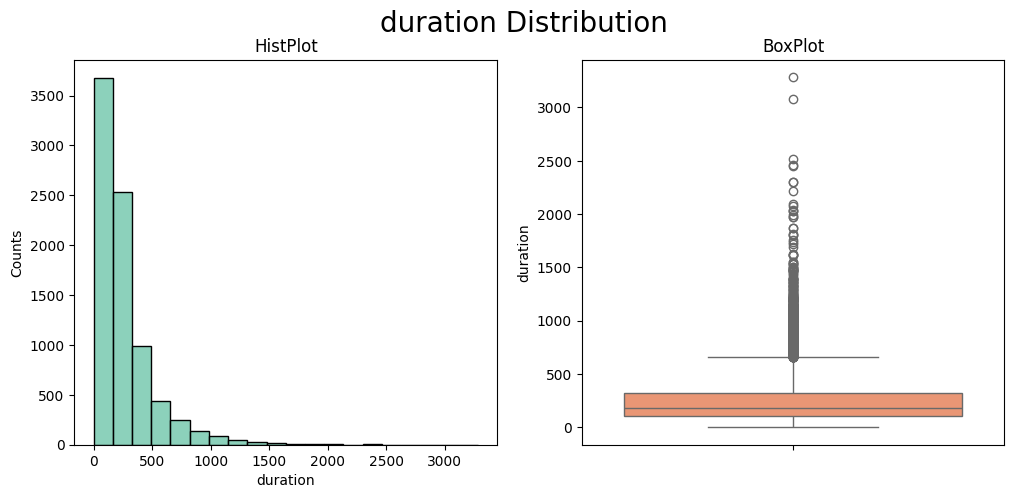

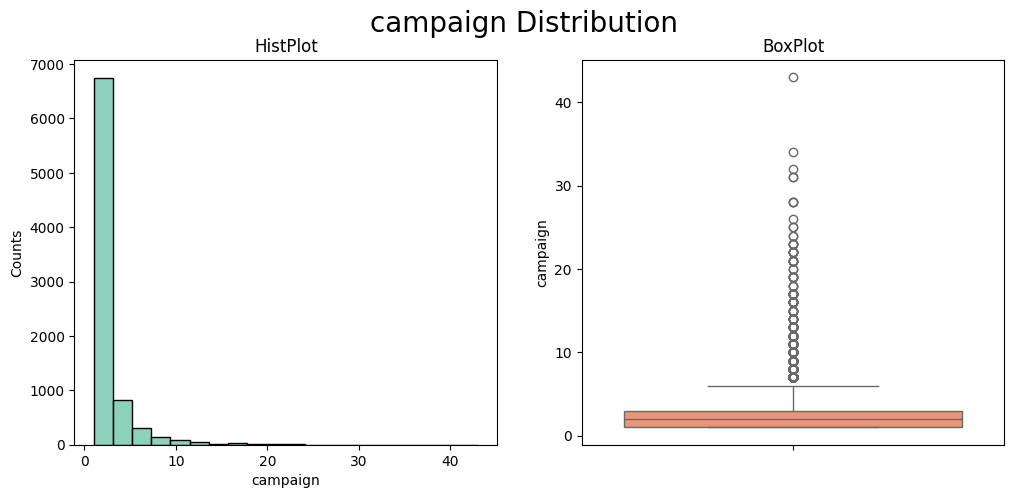

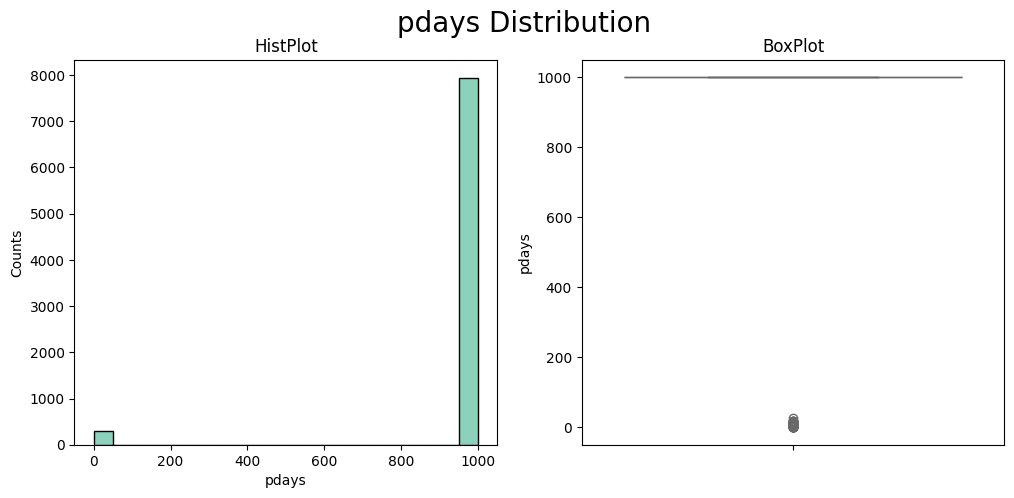

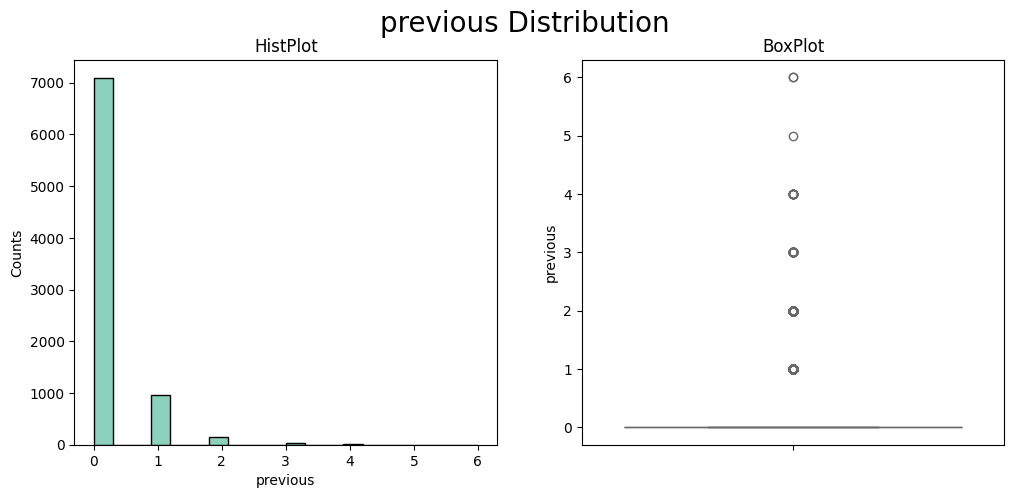

In [15]:
palette = sns.color_palette("Set2")

for column in num_col:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle(f"{column} Distribution", fontsize=20)

    plt.subplot(1,2,1)
    sns.histplot(df[column], color=palette[0], bins=20)
    plt.title("HistPlot")
    plt.xlabel(column)
    plt.ylabel("Counts")

    plt.subplot(1,2,2)
    sns.boxplot(df[column], color=palette[1])
    plt.title("BoxPlot")

    plt.show()

In [16]:
df.isnull().sum()

age             0
job            10
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

Dari sini didapatkan bahwa:
- kolom 'job' terdapat 10 missing values
- kolom 'duration' terdapat 15 missing values

Missing Values (NaN) ini akan dihandle setelah split.

# SPLITTING

In [17]:
input_df  = df.drop('y', axis = 1)
output_df = df['y']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6589, 15)
(1648, 15)
(6589,)
(1648,)


In [20]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,52,admin.,married,university.degree,no,yes,yes,cellular,nov,tue,79.0,1,999,0,nonexistent
5899,33,blue-collar,married,basic.4y,no,yes,yes,telephone,may,wed,220.0,7,999,0,nonexistent
5022,63,unknown,married,professional.course,no,no,no,cellular,oct,thu,235.0,1,6,1,success
4556,44,blue-collar,married,basic.4y,no,no,no,cellular,may,fri,82.0,2,999,1,failure
4139,33,services,married,high.school,unknown,yes,no,telephone,jun,fri,106.0,3,999,0,nonexistent


In [21]:
y_train

3805    no
5899    no
5022    no
4556    no
4139    no
        ..
5734    no
5191    no
5390    no
860     no
7270    no
Name: y, Length: 6589, dtype: object

# IMPUTE MISSING VALUES

In [22]:
df.isnull().sum()

age             0
job            10
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

Dari sini, kolom 'job' dan 'duration' memiliki missing values.

## Job

Karena 'Job' adalah categorical values, di replace menggunakan modus

In [23]:
x_train['job'].value_counts()

job
admin.           1651
blue-collar      1498
technician       1079
services          618
management        507
retired           269
self-employed     232
entrepreneur      222
unemployed        166
housemaid         156
student           139
unknown            44
Name: count, dtype: int64

In [24]:
job_mode =  x_train['job'].mode()[0]
job_mode

'admin.'

In [25]:
x_train['job'].fillna(job_mode, inplace=True)
x_test['job'].fillna(job_mode, inplace=True)

## DURATION

Karena 'Duration' disini adalah numerical values, dilihat dahulu apakah terdapat outlier/tidak

<Axes: ylabel='duration'>

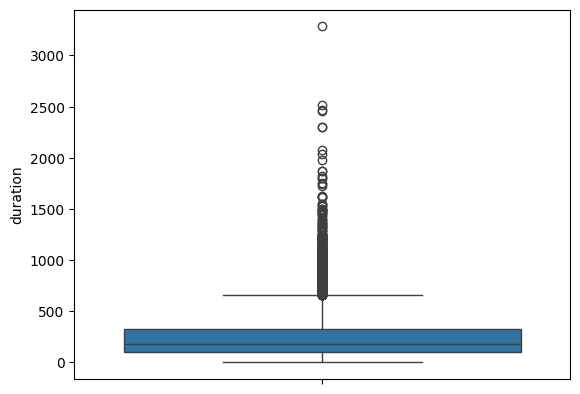

In [26]:
sns.boxplot(x_train['duration'])

Karena ada outliers, replace NaN/NULL values pada kolom **duration** menggunakan **median.**

In [27]:
duration_median = x_train['duration'].median()
duration_median

182.0

In [28]:
x_train['duration'].fillna(duration_median, inplace=True)
x_test['duration'].fillna(duration_median, inplace=True)

In [29]:
print(x_train.isnull().sum())
print("_"*20)
print(x_test.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64
____________________
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Dari sini bisa dilihat bahwa sekarang dataset sudah bersih dan tidak terdapat missing values

# FEATURE ENGINEERING

## ENCODING

In [30]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [31]:
for c in df[cat_col]:
    print(df[c].value_counts())
    print('_'*50)
    print()

job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64
__________________________________________________

marital
married     4943
single      2345
divorced     936
unknown       13
Name: count, dtype: int64
__________________________________________________

education
university.degree      2456
high.school            1902
basic.9y               1157
professional.course    1070
basic.4y                862
basic.6y                456
unknown                 328
illiterate                6
Name: count, dtype: int64
__________________________________________________

default
no         6533
unknown    1701
yes           3
Name: count, dtype: int64
__________________________________________________

housing
yes        4308
no         3730
unknown     19

### ONEHOT

In [32]:
OHE_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [33]:
from sklearn.preprocessing import OneHotEncoder
OHE_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_train = OHE_encoder.fit_transform(x_train[OHE_col])
encoded_train_df = pd.DataFrame(encoded_train, columns=OHE_encoder.get_feature_names_out(OHE_col))
x_train = x_train.reset_index(drop=True)
x_train = pd.concat([x_train.drop(OHE_col, axis=1), encoded_train_df], axis=1)

In [34]:
x_train.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,52,cellular,nov,tue,79.0,1,999,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,33,telephone,may,wed,220.0,7,999,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,63,cellular,oct,thu,235.0,1,6,1,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,44,cellular,may,fri,82.0,2,999,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,33,telephone,jun,fri,106.0,3,999,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
encoded_test = OHE_encoder.transform(x_test[OHE_col])
encoded_test_df = pd.DataFrame(encoded_test, columns=OHE_encoder.get_feature_names_out(OHE_col))
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test.drop(OHE_col, axis=1), encoded_test_df], axis=1)

In [36]:
x_test.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,cellular,aug,wed,198.0,1,999,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,27,telephone,may,tue,134.0,2,999,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,27,telephone,may,thu,444.0,1,999,0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,54,telephone,may,wed,388.0,7,999,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,42,cellular,apr,mon,220.0,3,999,0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### BINARY & LABEL

In [37]:
enc_contact = {"contact": {"cellular":0, "telephone":1}}
x_train = x_train.replace(enc_contact)
x_test = x_test.replace(enc_contact)

In [38]:
enc_month = {"month": {"mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}}
x_train = x_train.replace(enc_month)
x_test = x_test.replace(enc_month)

In [39]:
enc_day = {"day_of_week": {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5}}
x_train = x_train.replace(enc_day)
x_test = x_test.replace(enc_day)

In [40]:
x_train.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,52,0,11,2,79.0,1,999,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,33,1,5,3,220.0,7,999,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,63,0,10,4,235.0,1,6,1,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,44,0,5,5,82.0,2,999,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,33,1,6,5,106.0,3,999,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
enc_y = {"no":0, "yes":1}
y_train = y_train.replace(enc_y)
y_test = y_test.replace(enc_y)

In [42]:
print(y_train, y_test)

3805    0
5899    0
5022    0
4556    0
4139    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: y, Length: 6589, dtype: int64 706     0
5325    0
1665    0
6675    0
5605    0
       ..
1811    0
296     0
6451    0
57      0
2131    0
Name: y, Length: 1648, dtype: int64


# SCALING

Karena banyak yang memiliki outlier, saya memutuskan menggunakan robustscaler

In [43]:
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [44]:
from sklearn.preprocessing import RobustScaler

scale_col = num_col
scaler = RobustScaler()
x_train[scale_col] = scaler.fit_transform(x_train[scale_col])
x_test[scale_col] = scaler.transform(x_test[scale_col])

In [45]:
x_train.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.933333,0,11,2,-0.466063,-0.5,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.333333,1,5,3,0.171946,2.5,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.666667,0,10,4,0.239819,-0.5,-993.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.400000,0,5,5,-0.452489,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.333333,1,6,5,-0.343891,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
x_test.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.200000,0,8,3,0.072398,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.733333,1,5,2,-0.217195,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.733333,1,5,4,1.185520,-0.5,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.066667,1,5,3,0.932127,2.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.266667,0,4,1,0.171946,0.5,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# MODELLING

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## DECISION TREE

In [48]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=5)

dt_grid.fit(x_train, y_train)
print("Best Parameters:", dt_grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
dt_best = DecisionTreeClassifier(criterion=dt_grid.best_params_['criterion'],
                                 max_depth=dt_grid.best_params_['max_depth'],
                                 min_samples_split=dt_grid.best_params_['min_samples_split'],
                                 min_samples_leaf=dt_grid.best_params_['min_samples_leaf'],
                                 random_state=42)

dt_best.fit(x_train, y_train)
y_pred = dt_best.predict(x_test)
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_dt)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1464
           1       0.63      0.40      0.49       184

    accuracy                           0.91      1648
   macro avg       0.78      0.68      0.72      1648
weighted avg       0.89      0.91      0.90      1648

Accuracy: 0.9065533980582524


# RANDOM FOREST

In [50]:
parameters={
    'n_estimators': [50,100],
    'criterion': ['gini', 'entrophy'],
    'max_depth': [3,6,9]
}

rf_grid = GridSearchCV(RandomForestClassifier(),
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = 5)

rf_grid.fit(x_train, y_train)
print("Best Param : ", rf_grid.best_params_)

Best Param :  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 50}


In [51]:
rf_best = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=50, random_state=42)
rf_best.fit(x_train, y_train)

y_pred = rf_best.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_rf)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1464
           1       0.68      0.17      0.28       184

    accuracy                           0.90      1648
   macro avg       0.79      0.58      0.61      1648
weighted avg       0.88      0.90      0.87      1648

Accuracy: 0.8986650485436893


## BAGGING

In [52]:
bagging_best = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

bagging_best.fit(x_train, y_train)
y_pred = bagging_best.predict(x_test)


print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_bg = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_bg)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1464
           1       0.54      0.31      0.39       184

    accuracy                           0.89      1648
   macro avg       0.73      0.64      0.67      1648
weighted avg       0.88      0.89      0.88      1648

Accuracy: 0.8932038834951457


## SVM

In [53]:
svc_best = SVC(kernel='rbf',
               C=1,
               gamma='scale',
               random_state=42)

svc_best.fit(x_train, y_train)
y_pred = svc_best.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_svm)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1464
           1       0.56      0.20      0.30       184

    accuracy                           0.89      1648
   macro avg       0.73      0.59      0.62      1648
weighted avg       0.87      0.89      0.87      1648

Accuracy: 0.8932038834951457


## KNN

In [54]:
knn_best = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski'
)

knn_best.fit(x_train, y_train)
y_pred = knn_best.predict(x_test)
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_knn)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1464
           1       0.54      0.34      0.42       184

    accuracy                           0.89      1648
   macro avg       0.73      0.65      0.68      1648
weighted avg       0.88      0.89      0.88      1648

Accuracy: 0.8944174757281553


## XGB BOOST

In [55]:
xgb_best = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_best.fit(x_train, y_train)
y_pred = xgb_best.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_xgb)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1464
           1       0.58      0.41      0.48       184

    accuracy                           0.90      1648
   macro avg       0.75      0.69      0.71      1648
weighted avg       0.89      0.90      0.89      1648

Accuracy: 0.9004854368932039


## GRADIENT BOOST

In [56]:
gbc_best = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbc_best.fit(x_train, y_train)
y_pred = gbc_best.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

acc_gbc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_gbc)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1464
           1       0.60      0.43      0.50       184

    accuracy                           0.90      1648
   macro avg       0.76      0.70      0.72      1648
weighted avg       0.89      0.90      0.90      1648

Accuracy: 0.904126213592233


## FINDING THE BEST ACCURACY

In [57]:
models = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'Bagging': acc_bg,
    'SVM': acc_svm,
    'KNN': acc_knn,
    'XGBoost': acc_xgb,
    'Gradient Boosting': acc_gbc
}

In [58]:
best_acc = 0
best_model = ""

for model_name, accuracy in models.items():
    print(f"{model_name}: {accuracy}")
    if accuracy > best_acc:
        best_acc = accuracy
        best_model = model_name

print()
print("Best Model:", best_model)
print("Best Accuracy:", best_acc)

Decision Tree: 0.9065533980582524
Random Forest: 0.8986650485436893
Bagging: 0.8932038834951457
SVM: 0.8932038834951457
KNN: 0.8944174757281553
XGBoost: 0.9004854368932039
Gradient Boosting: 0.904126213592233

Best Model: Decision Tree
Best Accuracy: 0.9065533980582524


Model terbaik berdasarkan akurasi adalah **Decision Tree** dengan nilai akurasi sebesar **0.9065533980582524**. Oleh karena itu, Decision Tree dipilih sebagai model yang akan digunakan karena memiliki akurasi tertinggi di antara semua model yang dievaluasi.

## PICKLE

In [59]:
import pickle

with open(f'dt_model.pkl', 'wb') as file:
    pickle.dump(dt_best, file)

In [60]:
with open('dt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_best}")

Accuracy: 0.9065533980582524


In [61]:
with open('OHE_encoder.pkl', 'wb') as file:
    pickle.dump(OHE_encoder, file)

In [62]:
# Pickle the encoding dictionaries
with open('enc_contact.pkl', 'wb') as file:
    pickle.dump(enc_contact, file)

with open('enc_month.pkl', 'wb') as file:
    pickle.dump(enc_month, file)

with open('enc_day.pkl', 'wb') as file:
    pickle.dump(enc_day, file)

In [63]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

LINK VIDEO:

https://drive.google.com/drive/folders/1n9oyrSAK2qAcHVd51vq-rthKG4wM3aPE?usp=drive_link


LINK CODE (COLLAB):

https://colab.research.google.com/drive/18VDYW8NBwsLcHXLA77xds4SbDMvCYj-R?usp=sharing
